In [ ]:
%pip install apyori
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
import matplotlib.pyplot as plt

# Dataset
[Medical cost personal dataset](https://www.kaggle.com/mirichoi0218/insurance)


In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df = df.drop(columns=['children','region'])

In [ ]:
df.head()

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


In [ ]:
df.max()

age             64
sex           male
bmi          53.13
smoker         yes
charges    63770.4
dtype: object

In [ ]:
df.min()

age             18
sex         female
bmi          15.96
smoker          no
charges    1121.87
dtype: object

In [ ]:
df.median()

age          39.000
bmi          30.400
charges    9382.033
dtype: float64

In [ ]:
df.mean()

age           39.207025
bmi           30.663397
charges    13270.422265
dtype: float64

In [ ]:
records = []
for ind in df.index:    
    records.append([float(df['bmi'][ind]),str(df['smoker'][ind]),float(df['charges'][ind]),str(df['sex'][ind]),int(df['age'][ind])])


In [ ]:
records

[[27.9, 'yes', 16884.924, 'female', 19],
 [33.77, 'no', 1725.5523, 'male', 18],
 [33.0, 'no', 4449.462, 'male', 28],
 [22.705, 'no', 21984.47061, 'male', 33],
 [28.88, 'no', 3866.8552, 'male', 32],
 [25.74, 'no', 3756.6216, 'female', 31],
 [33.44, 'no', 8240.5896, 'female', 46],
 [27.74, 'no', 7281.5056, 'female', 37],
 [29.83, 'no', 6406.4107, 'male', 37],
 [25.84, 'no', 28923.136919999997, 'female', 60],
 [26.22, 'no', 2721.3208, 'male', 25],
 [26.29, 'yes', 27808.7251, 'female', 62],
 [34.4, 'no', 1826.8429999999998, 'male', 23],
 [39.82, 'no', 11090.7178, 'female', 56],
 [42.13, 'yes', 39611.7577, 'male', 27],
 [24.6, 'no', 1837.237, 'male', 19],
 [30.78, 'no', 10797.3362, 'female', 52],
 [23.845, 'no', 2395.17155, 'male', 23],
 [40.3, 'no', 10602.385, 'male', 56],
 [35.3, 'yes', 36837.467000000004, 'male', 30],
 [36.005, 'no', 13228.84695, 'female', 60],
 [32.4, 'no', 4149.736, 'female', 30],
 [34.1, 'no', 1137.011, 'male', 18],
 [31.92, 'yes', 37701.8768, 'female', 34],
 [28.025,

In [ ]:
for i in range(0,1338):
    if records[i][2]<=10000:
        records[i][2]='lowCharges'
    elif records[i][2]>10000 and records[i][2]<=20000:
        records[i][2]='mediumCharges'
    else: 
        records[i][2]='highCharges'  

In [ ]:
for i in range(0,1338):
    if records[i][0]<=25:
        records[i][0]='lowBMI'
    elif records[i][0]>25 and records[i][0]<=30:
        records[i][0]='mediumBMI'
    else: 
        records[i][0]='highBMI' 

In [ ]:
for i in range(0,1338):
    if records[i][1]=='yes':
        records[i][1]='smoker'
    else: 
        records[i][1]='nonSmoker' 

In [ ]:
for i in range(0,1338):
    if records[i][4]<=30:
        records[i][4]='youngAdult'
    elif records[i][4]>30 and records[i][4]<=50:
        records[i][4]='oldAdult'
    else: 
        records[i][4]='old'  

In [ ]:
records

[['mediumBMI', 'smoker', 'mediumCharges', 'female', 'youngAdult'],
 ['highBMI', 'nonSmoker', 'lowCharges', 'male', 'youngAdult'],
 ['highBMI', 'nonSmoker', 'lowCharges', 'male', 'youngAdult'],
 ['lowBMI', 'nonSmoker', 'highCharges', 'male', 'oldAdult'],
 ['mediumBMI', 'nonSmoker', 'lowCharges', 'male', 'oldAdult'],
 ['mediumBMI', 'nonSmoker', 'lowCharges', 'female', 'oldAdult'],
 ['highBMI', 'nonSmoker', 'lowCharges', 'female', 'oldAdult'],
 ['mediumBMI', 'nonSmoker', 'lowCharges', 'female', 'oldAdult'],
 ['mediumBMI', 'nonSmoker', 'lowCharges', 'male', 'oldAdult'],
 ['mediumBMI', 'nonSmoker', 'highCharges', 'female', 'old'],
 ['mediumBMI', 'nonSmoker', 'lowCharges', 'male', 'youngAdult'],
 ['mediumBMI', 'smoker', 'highCharges', 'female', 'old'],
 ['highBMI', 'nonSmoker', 'lowCharges', 'male', 'youngAdult'],
 ['highBMI', 'nonSmoker', 'mediumCharges', 'female', 'old'],
 ['highBMI', 'smoker', 'highCharges', 'male', 'youngAdult'],
 ['lowBMI', 'nonSmoker', 'lowCharges', 'male', 'youngAdult

In [ ]:
records = np.asarray(records)
records = records.astype('str')

In [ ]:
association_rules = apriori(records, min_support=0.095, min_confidence=0.4, min_lift=3, min_length=2)
association_results = list(association_rules)
type(association_rules)


generator

In [ ]:
print(len(association_results))
print(association_results[0])
association_results

4
RelationRecord(items=frozenset({'smoker', 'highCharges'}), support=0.15844544095665172, ordered_statistics=[OrderedStatistic(items_base=frozenset({'highCharges'}), items_add=frozenset({'smoker'}), confidence=0.7765567765567766, lift=3.792091120558274), OrderedStatistic(items_base=frozenset({'smoker'}), items_add=frozenset({'highCharges'}), confidence=0.7737226277372263, lift=3.792091120558274)])


[RelationRecord(items=frozenset({'smoker', 'highCharges'}), support=0.15844544095665172, ordered_statistics=[OrderedStatistic(items_base=frozenset({'highCharges'}), items_add=frozenset({'smoker'}), confidence=0.7765567765567766, lift=3.792091120558274), OrderedStatistic(items_base=frozenset({'smoker'}), items_add=frozenset({'highCharges'}), confidence=0.7737226277372263, lift=3.792091120558274)]),
 RelationRecord(items=frozenset({'smoker', 'highCharges', 'highBMI'}), support=0.10762331838565023, ordered_statistics=[OrderedStatistic(items_base=frozenset({'highCharges'}), items_add=frozenset({'smoker', 'highBMI'}), confidence=0.5274725274725275, lift=4.901098901098901), OrderedStatistic(items_base=frozenset({'smoker'}), items_add=frozenset({'highCharges', 'highBMI'}), confidence=0.5255474452554745, lift=3.99535500995355), OrderedStatistic(items_base=frozenset({'highCharges', 'highBMI'}), items_add=frozenset({'smoker'}), confidence=0.8181818181818181, lift=3.99535500995355), OrderedStatis

In [ ]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: smoker -> highCharges
Support: 0.15844544095665172
Confidence: 0.7765567765567766
Lift: 3.792091120558274
Rule: smoker -> highCharges
Support: 0.10762331838565023
Confidence: 0.5274725274725275
Lift: 4.901098901098901
Rule: smoker -> male
Support: 0.09566517189835576
Confidence: 0.46886446886446886
Lift: 3.9455387379915683
Rule: nonSmoker -> old
Support: 0.10463378176382661
Confidence: 0.7954545454545454
Lift: 3.6449252801992524


# Conclusion from results using apriori algorithm
## This data comes from the USA
Results show that if you are a smoker you pay more(highCharges>20000) for the insurance which makes sense due to your higher chance of dying early. If you have high BMI(>30) you also pay more for the insurence which again makes sense beacause all of heart problems etc. Results showed that being a male is releted to higher bill for inserence aswell(for some reasons -> might be because males often have more dangerous jobs like in the construction)

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#sex
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])

#smoker
df['smoker']=le.fit_transform(df['smoker'])

#region
df_region=pd.get_dummies(df['region'])

df=pd.concat([df,df_region],axis=1)
df=df.drop(['region'],axis=1)


df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [ ]:
df.corr()['charges'].sort_values()

southwest   -0.043210
northwest   -0.039905
northeast    0.006349
sex          0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

<AxesSubplot:>

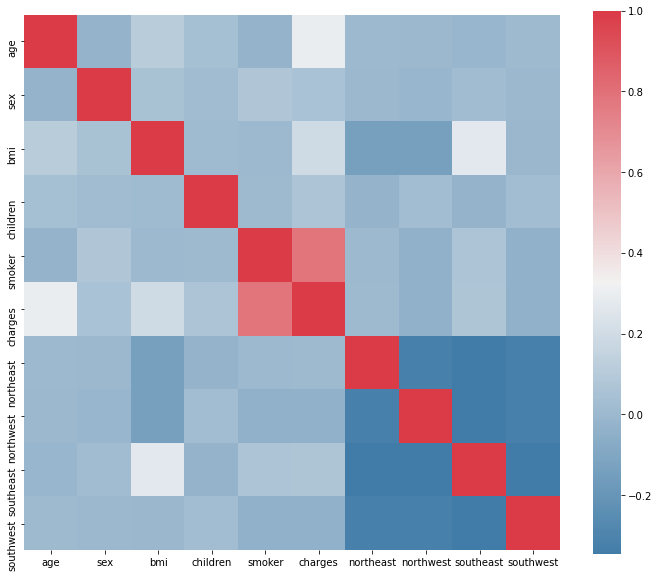

In [ ]:
f,ax=plt.subplots(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

C:\Users\bakoz\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bakoz\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


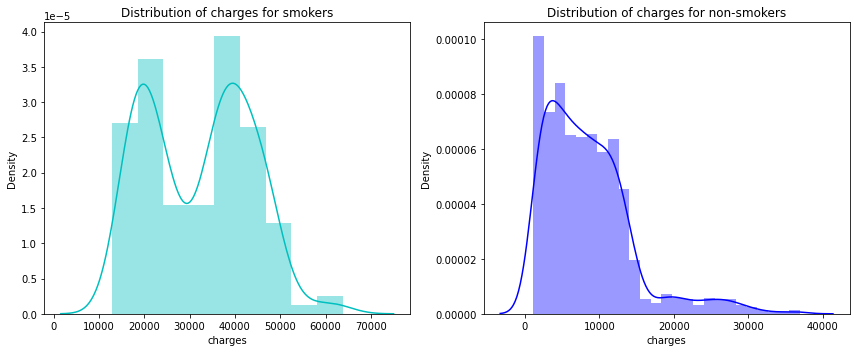

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers') 
plt.tight_layout()

C:\Users\bakoz\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bakoz\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


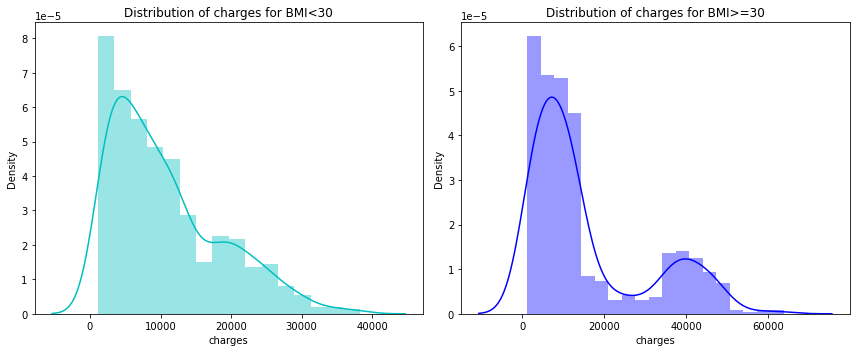

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.bmi <30)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for BMI<30')

ax=f.add_subplot(122)
sns.distplot(df[(df.bmi >=30)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for BMI>=30') 
plt.tight_layout()

C:\Users\bakoz\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bakoz\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


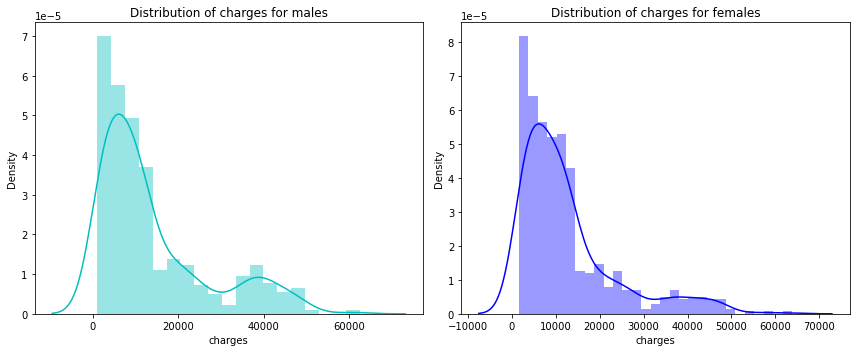

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.sex == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for males')

ax=f.add_subplot(122)
sns.distplot(df[(df.sex == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for females') 
plt.tight_layout()

C:\Users\bakoz\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bakoz\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


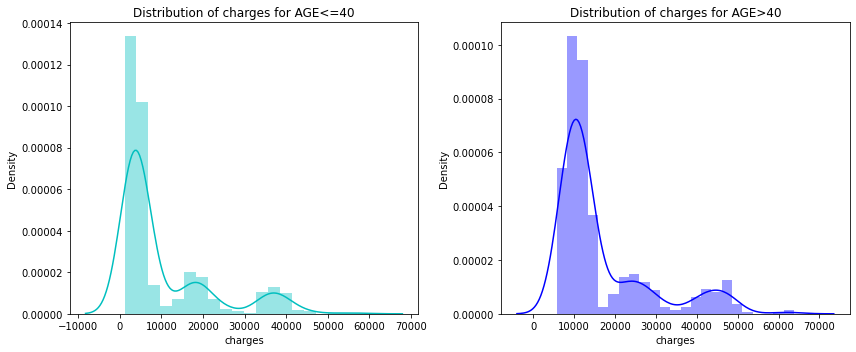

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.age <=40)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for AGE<=40')

ax=f.add_subplot(122)
sns.distplot(df[(df.age>40)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for AGE>40') 
plt.tight_layout()

# Conculsion from another method
As we can see at the heatmap charges realy depends on being a smoker or not(pink squers), as well as BMI level(white squers) and sex(light blue). In the matrix we can see that charges also depends on age which we didnt know from apriori algorithm. Distrubution graphs of charges depending on different variables confirm results from apriori algorithm and heatmap